# Amazon Kindle Sentiment Analysis

### Import Library
Importing the library that we will need, in this project we use matplotlib and seaborn to visualize the data, we use train_test_split from sklearn to splitting the dataset, and we use Conv1D and also LSTM to have predict of this analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import json 
import string
import unicodedata
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout
from tensorflow.keras.layers import Embedding
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load the Data from local directory
The source of dataset are from kaggle (https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis)
and I used this dataset for the learning purposed.

In [2]:
data = pd.read_csv('./preprocessed_kindle_review .csv')
data.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


### Cleaning the Data

In [3]:
data.isnull().sum()

Unnamed: 0    0
rating        0
reviewText    0
summary       0
dtype: int64

In [4]:
data_new = data[['reviewText', 'rating']]
data_new.head()

,reviewText,rating
0,This book was the very first bookmobile book I...,5
1,"When I read the description for this book, I c...",1
2,I just had to edit this review. This book is a...,5
3,I don't normally buy 'mystery' novels because ...,5
4,"This isn't the kind of book I normally read, a...",5


In [ ]:
data_new['rating'].value_counts()

### Visualize the data
In this section, it shows 5 rating category of Amazon's Kindle, and the positive reviews (4 and 5 stars) have similar amount.
Same as the negative reviews the 3 bottom of the review have a similar amount

Text(0.5, 0, 'Rating')

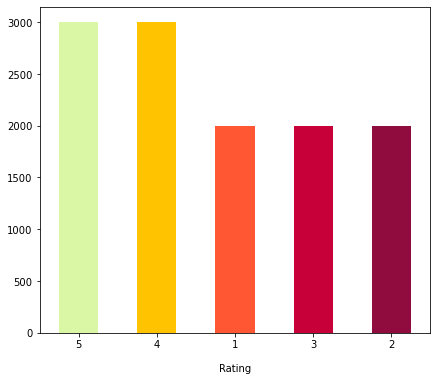

In [6]:
colorss = ['#DAF7A6', '#FFC300', '#FF5733', '#C70039', '#900C3F']
data_new['rating'].value_counts().plot(kind='bar', color = colorss, figsize=(7, 6), rot = 0);
plt.xlabel("Rating", labelpad=14)

We divided into 2 category, the first one is positive reviews (4 and 5 Stars) and the negative one (1,2 and 3 Stars), we use .loc
to have labelled category

In [7]:
data_new.loc[data_new['rating'] > 3,'rating_cat'] = 'Positive'
#data_new.loc[data_new['rating'] == 3,'rating_cat'] = 'Neutral'
data_new.loc[data_new['rating'] <= 3,'rating_cat'] = 'Negative'

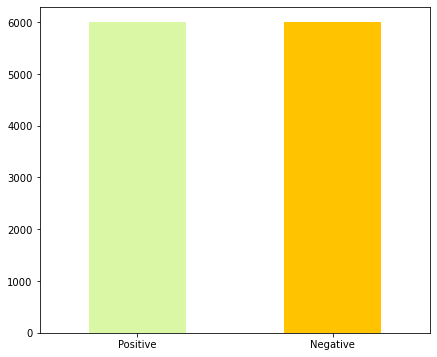

In [8]:
data_new['rating_cat'].value_counts().plot(kind='bar', color = colorss, figsize=(7, 6), rot = 0);

## Preprocessing

In [9]:
data_new['reviewText'] = data_new['reviewText'].str.lower() 
data_new.head()

,reviewText,rating,rating_cat
0,this book was the very first bookmobile book i...,5,Positive
1,"when i read the description for this book, i c...",1,Negative
2,i just had to edit this review. this book is a...,5,Positive
3,i don't normally buy 'mystery' novels because ...,5,Positive
4,"this isn't the kind of book i normally read, a...",5,Positive


In [10]:
data_new['reviewText'] = data_new['reviewText'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))

In [11]:
data_new['reviewText'] = data_new['reviewText'].apply(lambda x: re.sub("\n", " ", x))

### Removing the Stopwords
Removing stopwords in Sentiment Analysis is an important part of preprocessinhg the data, this could remove the low-level information from our text in order to give more focus to the important information.

In [12]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", 
             "an", "and", "any", "are", "as", "at", "be", "because", "been", 
             "before", "being", "below", "between", "both", "but", "by", "could", 
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", 
             "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", 
             "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", 
             "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", 
             "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", 
             "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", 
             "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", 
             "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", 
             "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", 
             "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", 
             "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", 
             "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", 
             "yourself", "yourselves" ]

data_new['reviewText'] = data_new['reviewText'].apply(lambda x: ' '.join([stop for stop in x.split() if stop not in stopwords]))

In [13]:
data_new

,reviewText,rating,rating_cat
0,book first bookmobile book bought school book ...,5,Positive
1,read description book couldnt wait read downlo...,1,Negative
2,just edit review book believe got right update...,5,Positive
3,dont normally buy mystery novels just dont lik...,5,Positive
4,isnt kind book normally read although try not ...,5,Positive
...,...,...,...
11995,read certain passages twice--typos wish built ...,2,Negative
11996,not expected yet interesting book usually don8...,3,Negative
11997,dragon knights world knights ride dragons not ...,5,Positive
11998,since story short hard say much without giving...,4,Positive


### Splitting the dataset
We use train_test_split from sklearn library and have 0.2 test size and 0.8 training size

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data_new['reviewText'], data_new['rating'], test_size = 0.2)

Labelling the dataset into boolean type, so it can easier to the factorize part

In [15]:
data_new.rating=data_new.rating.replace([1,2,3],0)
data_new.rating=data_new.rating.replace([4,5],1)

In [16]:
factorize_label = data_new.rating.factorize()
factorize_label

(array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 Int64Index([1, 0], dtype='int64'))

In [17]:
data_new

,reviewText,rating,rating_cat
0,book first bookmobile book bought school book ...,1,Positive
1,read description book couldnt wait read downlo...,0,Negative
2,just edit review book believe got right update...,1,Positive
3,dont normally buy mystery novels just dont lik...,1,Positive
4,isnt kind book normally read although try not ...,1,Positive
...,...,...,...
11995,read certain passages twice--typos wish built ...,0,Negative
11996,not expected yet interesting book usually don8...,0,Negative
11997,dragon knights world knights ride dragons not ...,1,Positive
11998,since story short hard say much without giving...,1,Positive


In [78]:
NUM_WORDS = 10000
EMBEDDING_DIM = 16
MAXLEN = 200
PADDING = 'post'
OOV_TOKEN = "<OOV>"

In [83]:
sentiment = data_new.reviewText
tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token = OOV_TOKEN)
tokenizer.fit_on_texts(sentiment)

sequences = tokenizer.texts_to_sequences(sentiment)
padded_sequence = pad_sequences(sequences, maxlen=MAXLEN)

### Building the Model with Conv1D and LSTM

In [105]:
tf.random.set_seed(123)

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=MAXLEN),
        #tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Conv1D(32,5),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 


In [106]:
print(model.summary())

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 200, 16)           160000    
                                                                 
 conv1d_25 (Conv1D)          (None, 196, 32)           2592      
                                                                 
 lstm_31 (LSTM)              (None, 128)               82432     
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 5)                 645       
                                                                 
 dense_54 (Dense)            (None, 1)                 6         
                                                                 
Total params: 245,675
Trainable params: 245,675
Non-t

In [107]:
model.fit(padded_sequence, factorize_label[0],validation_split=0.25, epochs=10, batch_size=32)

Epoch 1/10
282/282 [==============================] - 90s 307ms/step - loss: 0.5185 - accuracy: 0.7339 - val_loss: 0.4248 - val_accuracy: 0.8073
Epoch 2/10
282/282 [==============================] - 85s 303ms/step - loss: 0.3209 - accuracy: 0.8686 - val_loss: 0.4074 - val_accuracy: 0.8177
Epoch 3/10
282/282 [==============================] - 87s 310ms/step - loss: 0.2279 - accuracy: 0.9147 - val_loss: 0.4723 - val_accuracy: 0.8033
Epoch 4/10
282/282 [==============================] - 86s 306ms/step - loss: 0.1581 - accuracy: 0.9419 - val_loss: 0.6141 - val_accuracy: 0.7953
Epoch 5/10
282/282 [==============================] - 86s 304ms/step - loss: 0.1149 - accuracy: 0.9588 - val_loss: 0.6625 - val_accuracy: 0.8007
Epoch 6/10
282/282 [==============================] - 86s 305ms/step - loss: 0.0818 - accuracy: 0.9708 - val_loss: 0.7796 - val_accuracy: 0.7910
Epoch 7/10
282/282 [==============================] - 87s 310ms/step - loss: 0.0579 - accuracy: 0.9797 - val_loss: 0.9060 - val_ac

In [46]:
def predict_sentences(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=120)
    prediction = int(model.predict(tw).round().item())
    
    return factorize_label[1][prediction]
    
test_input = input('Write your review: ')
prediction = predict_sentences(test_input)
if prediction == 1:
    print("Congrats! It's a Positive Statement :D")
else:
    print("Sorry, You've got Negative Statement :()")

Write your review: i'm not gonna use it
Positive Statement
